In [15]:
#import module
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import style
import pickle
import random 
    
style.use('fivethirtyeight')

In [16]:
#xs =  np.array([1,2,3,4,5,6], dtype=np.float64)
#ys = np.array([5,4,6,5,6,7], dtype=np.float64)

In [18]:
#function to create dataset
def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-= step
            
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys, dtype=np.float64)


In [27]:
xs, ys = create_dataset(40, 10,2, correlation='pos')

#### Calculate the best fit slope  and best fit line

In [28]:

def best_fit_slope_and_intercept(xs,ys):
    #m is the slope 
    #m =((mean of x * mean of y) - mean of (x* y) ) / (( (mean of x) * (mean of x)) - mean of (x*x))
    m = ( ((mean(xs) * mean(ys))  - mean(xs*ys)) / (mean(xs)*mean(xs) - mean(xs*xs)))
    
    #b = (mean of y) - m(mean of x)
    b = mean(ys) - m*mean(xs)
    
    return m, b

In [29]:
#function to determine squared error
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig )**2)


In [1]:
#function to determine coeffient of determination

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean= squared_error(ys_orig, y_mean_line)
    
    return 1 - (squared_error_regr / squared_error_y_mean)

In [31]:
m, b = best_fit_slope_and_intercept(xs,ys)
print("best fit slope:",m)
print("best fit line:",b)

best fit slope: 1.9736397748592867
best fit line: 1.889024390243911


[1.889024390243911, 3.8626641651031974, 5.836303939962484, 7.809943714821771, 9.783583489681057, 11.757223264540345, 13.730863039399631, 15.704502814258918, 17.678142589118202, 19.651782363977492, 21.62542213883678, 23.599061913696065, 25.57270168855535, 27.546341463414638, 29.519981238273925, 31.49362101313321, 33.4672607879925, 35.44090056285179, 37.414540337711074, 39.38818011257036, 41.36181988742965, 43.33545966228893, 45.30909943714822, 47.282739212007506, 49.25637898686679, 51.23001876172608, 53.203658536585365, 55.17729831144465, 57.15093808630394, 59.124577861163225, 61.09821763602251, 63.0718574108818, 65.04549718574108, 67.01913696060038, 68.99277673545967, 70.96641651031894, 72.94005628517823, 74.91369606003752, 76.88733583489682, 78.86097560975608]


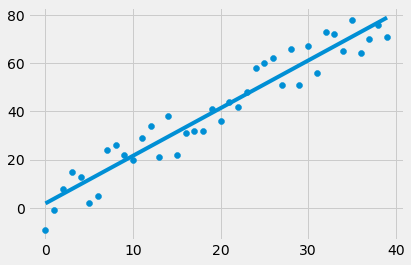

In [32]:
regression_line = [(m*x) + b for x in xs]
print(regression_line)

plt.scatter(xs,ys)
plt.plot(xs,regression_line)



In [33]:
r_squared = coefficient_of_determination(ys, regression_line)
print("r_squared:",r_squared)

r_squared: 0.9235068411799665


#### do some prediction

[37.511069418386484, 39.15178236397749, 40.79249530956848, 42.43320825515947, 44.073921200750476, 45.71463414634147]


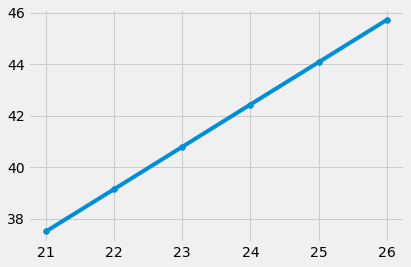

In [26]:
x_values =np.array([21,22,23,24,25,26])

prediction_y = [(m*x) + b for x in x_values]

print(prediction_y)
plt.scatter(x_values,prediction_y)
plt.plot(x_values,prediction_y)